#Importing Libraries libraries like Pandas and Requests

In [3]:
import pandas as pd
import requests as rq

# We need The Latitude and longitude of capitals of all countries

In [4]:
lon_lat=pd.read_csv("new_countries.csv")
lon_lat=lon_lat[lon_lat["capital"]== "primary"]
lon_lat=lon_lat[["city","city_ascii","lat","lng","country","capital"]]
lon_lat

,city,city_ascii,lat,lng,country,capital
0,Tokyo,Tokyo,35.6870,139.7495,Japan,primary
1,Jakarta,Jakarta,-6.1750,106.8275,Indonesia,primary
5,Manila,Manila,14.5958,120.9772,Philippines,primary
8,Seoul,Seoul,37.5667,126.9833,"Korea, South",primary
9,Mexico City,Mexico City,19.4333,-99.1333,Mexico,primary
...,...,...,...,...,...,...
47679,Ngerulmud,Ngerulmud,7.5006,134.6242,Palau,primary
47750,Adamstown,Adamstown,-25.0667,-130.0833,Pitcairn Islands,primary
47876,King Edward Point,King Edward Point,-54.2833,-36.5000,South Georgia And South Sandwich Islands,primary
47916,Plymouth,Plymouth,16.7064,-62.2158,Montserrat,primary


# Importing data about pollution from WAQI (World Air Quality Index) API  

In [5]:
whole_data=[]
TOKEN = "bce03ecd68a38ef798553b1d89c1f50a695bd409"

cities=lon_lat["city"]
for v in cities :
    city=v

    url = f"https://api.waqi.info/feed/{city}/?token={TOKEN}"

    response = rq.get(url)
    data = response.json()

    data = response.json()

    if data["status"]=="ok":
      whole_dict={g:v["v"] for g,v in data["data"]["iaqi"].items() if g in ["co","o3","pm10","h","pm25","so"]}
      whole_dict["city"]=data["data"]["city"]["name"]

      date = data["data"].get("time", {})
      date = date.get("s") or None
      whole_dict["date"] = date

      whole_data.append(whole_dict)

whole_data


[{'co': 2.3,
  'h': 68.9,
  'o3': 37.6,
  'pm10': 24,
  'pm25': 50,
  'city': 'Meguro (目黒)',
  'date': '2025-08-20 22:00:00'},
 {'h': 94,
  'pm25': 74,
  'city': 'Kemayoran, Indonesia',
  'date': '2025-08-20 21:00:00'},
 {'h': 74,
  'pm25': 88,
  'city': 'Manila US Embassy, Philippines',
  'date': '2025-08-20 20:00:00'},
 {'co': 3.2,
  'h': 77.6,
  'o3': 15.2,
  'pm10': 21,
  'pm25': 38,
  'city': 'Seoul (서울)',
  'date': '2025-08-20 23:00:00'},
 {'co': 7.8,
  'h': 72,
  'o3': 5.6,
  'pm10': 29,
  'pm25': 57,
  'city': 'Merced, México, Mexico',
  'date': '2025-08-20 08:00:00'},
 {'h': 42,
  'pm25': 57,
  'city': 'Cairo US Embassy, Egypt',
  'date': '2025-03-04 13:00:00'},
 {'h': 20,
  'pm25': 152,
  'city': 'Dhaka US Consulate, Bangladesh',
  'date': '2025-03-04 16:00:00'},
 {'co': 10,
  'h': 88,
  'o3': 44.3,
  'pm10': 45,
  'pm25': 109,
  'city': 'Beijing (北京)',
  'date': '2025-08-20 22:00:00'},
 {'co': 0.1,
  'h': 8.7,
  'o3': 4.8,
  'pm10': 15,
  'pm25': 53,
  'city': 'Bangkok',
  '

#Convert dictionary to DataFrame to can deal with it

In [145]:
df=pd.DataFrame(whole_data)
df

,co,h,o3,pm10,pm25,city,date
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),2025-08-20 22:00:00
1,NaN,94.0,NaN,NaN,74.0,"Kemayoran, Indonesia",2025-08-20 21:00:00
2,NaN,74.0,NaN,NaN,88.0,"Manila US Embassy, Philippines",2025-08-20 20:00:00
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),2025-08-20 23:00:00
4,7.8,72.0,5.6,29.0,57.0,"Merced, México, Mexico",2025-08-20 08:00:00
...,...,...,...,...,...,...,...
139,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio, Italy",2025-08-19 23:00:00
140,NaN,78.5,21.6,NaN,13.0,"Kingston, Ontario, Canada",2025-08-20 10:00:00
141,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe, France",2025-08-20 08:00:00
142,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey, USA",2025-08-20 09:00:00


# Split City and Country

In [146]:
df[["city","country"]]=df["city"].str.rsplit(",",n=1,expand=True)
df[["country","city"]].to_csv("countries2.csv")
df

,co,h,o3,pm10,pm25,city,date,country
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),2025-08-20 22:00:00,None
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,2025-08-20 21:00:00,Indonesia
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,2025-08-20 20:00:00,Philippines
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),2025-08-20 23:00:00,None
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",2025-08-20 08:00:00,Mexico
...,...,...,...,...,...,...,...,...
139,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",2025-08-19 23:00:00,Italy
140,NaN,78.5,21.6,NaN,13.0,"Kingston, Ontario",2025-08-20 10:00:00,Canada
141,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",2025-08-20 08:00:00,France
142,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",2025-08-20 09:00:00,USA


 # Csv file has data about Cars and Factories in these cities

In [147]:
df2=pd.read_csv("Number-of-cars-and-factories.csv")
df2=df2["Country,City,Diesel_Cars,Gasoline_Cars,Industrial_Factories"].str.rsplit(",",n=3,expand=True)
df2.columns=["country","Diesel_Cars","Gasoline_Cars","Industrial_Factories"]
df2[["country","city1","city2","city3"]]=df2["country"].str.rsplit(",",n=3,expand=True)
df2["city"]=df2["city1"].fillna('')+' '+df2["city2"].fillna('')+' '+df2["city3"].fillna('')
df2=df2[["city","country","Diesel_Cars","Gasoline_Cars","Industrial_Factories"]]
df2

,city,country,Diesel_Cars,Gasoline_Cars,Industrial_Factories
0,Meguro (目黒),Japan,135000,315000,120
1,Kemayoran,Indonesia,2550000,5950000,2500
2,Manila US Embassy,Philippines,840000,1960000,1800
3,Seoul (서울),South Korea,2250000,5250000,3500
4,Merced México,Mexico,1500000,3500000,2200
...,...,...,...,...,...
139,Cipro Roma Lazio,Italy,1000000,1500000,1400
140,Kingston Ontario,Canada,36000,84000,80
141,Bt_artchipel Guadeloupe,France,45000,105000,40
142,Brigantine NewJersey,USA,60000,340000,150


In [148]:
df

,co,h,o3,pm10,pm25,city,date,country
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),2025-08-20 22:00:00,None
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,2025-08-20 21:00:00,Indonesia
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,2025-08-20 20:00:00,Philippines
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),2025-08-20 23:00:00,None
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",2025-08-20 08:00:00,Mexico
...,...,...,...,...,...,...,...,...
139,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",2025-08-19 23:00:00,Italy
140,NaN,78.5,21.6,NaN,13.0,"Kingston, Ontario",2025-08-20 10:00:00,Canada
141,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",2025-08-20 08:00:00,France
142,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",2025-08-20 09:00:00,USA


In [149]:
df[["country","1"]]=df["country"].str.split("(",expand=True)
df

,co,h,o3,pm10,pm25,city,date,country,1
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),2025-08-20 22:00:00,None,None
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,2025-08-20 21:00:00,Indonesia,None
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,2025-08-20 20:00:00,Philippines,None
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),2025-08-20 23:00:00,None,None
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",2025-08-20 08:00:00,Mexico,None
...,...,...,...,...,...,...,...,...,...
139,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",2025-08-19 23:00:00,Italy,None
140,NaN,78.5,21.6,NaN,13.0,"Kingston, Ontario",2025-08-20 10:00:00,Canada,None
141,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",2025-08-20 08:00:00,France,None
142,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",2025-08-20 09:00:00,USA,None


In [150]:
df["1"].unique()

array([None, 'امام خمینی تهران)', 'Trường Quốc tế Liên Hợp Quốc Hà Nội)',
       '中環)', ' الرياض - الضباط )', 'منطقة اليرموك)', 'المنصورية)',
       'Luftdaten #21428)', '中山)', 'Мишээл экспо)',
       'Бишкек АКШ элчилиги)', 'Центар)',
       'Λευκωσία - Κυκλοφοριακός Σταθμός)', '諏訪諏訪市)'], dtype=object)

In [151]:
df["country"]=df["country"].str.strip()

In [152]:
df["country"].unique()

array([None, 'Indonesia', 'Philippines', 'Mexico', 'Egypt', 'Bangladesh',
       'Москва)', 'Argentina', 'Tehran', 'Congo', 'Peru', 'Vietnam',
       'Colombia', 'Sudan', 'HongKong', 'Saudi Arabia', 'Chile',
       'Maynmar', 'Iraq', 'Singapore', 'Turkey', 'Ethiopia', 'Kenya',
       'USA', 'Ivory Coast', 'South Africa', 'Germany', 'Afganistan',
       'Mali', 'Jordan', 'Nigeria', 'Uzbekistan', 'Burkina Faso',
       'Greece', 'Guatemala', 'Kuwait', 'Ukraine', 'Italy', 'Taiwan',
       'Romania', 'Algeria', 'Azerbaijan', 'Austria', 'Cambodia',
       'Poland', 'Puerto Rico', 'Ecuador', 'Hungary', 'Uganda', 'Guinea',
       'Tajikistan', 'California', 'El Salavor', 'Togo', 'UAE',
       'Столична)', 'Ulaanbaatar', 'Czech Republic', 'Denmark',
       'Madagascar', 'Serbia', 'Rwanda', 'Kyrgyzstan', 'Georgia',
       'Armenia', 'АҚШ елшілігі)', 'Turkmenistan', 'Pakistan', 'Sweden',
       'Laos', 'usalem)', 'Chad', 'Gabon', 'Croatia', 'Sri Lanka',
       'Bahrain', 'Norway', 'Moldova', 'Es

In [153]:
df

,co,h,o3,pm10,pm25,city,date,country,1
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),2025-08-20 22:00:00,None,None
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,2025-08-20 21:00:00,Indonesia,None
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,2025-08-20 20:00:00,Philippines,None
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),2025-08-20 23:00:00,None,None
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",2025-08-20 08:00:00,Mexico,None
...,...,...,...,...,...,...,...,...,...
139,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",2025-08-19 23:00:00,Italy,None
140,NaN,78.5,21.6,NaN,13.0,"Kingston, Ontario",2025-08-20 10:00:00,Canada,None
141,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",2025-08-20 08:00:00,France,None
142,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",2025-08-20 09:00:00,USA,None


In [154]:
df=df[["co","h","o3","pm10","pm25","city","country","date"]]
df

,co,h,o3,pm10,pm25,city,country,date
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),None,2025-08-20 22:00:00
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,Indonesia,2025-08-20 21:00:00
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,Philippines,2025-08-20 20:00:00
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),None,2025-08-20 23:00:00
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",Mexico,2025-08-20 08:00:00
...,...,...,...,...,...,...,...,...
139,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",Italy,2025-08-19 23:00:00
140,NaN,78.5,21.6,NaN,13.0,"Kingston, Ontario",Canada,2025-08-20 10:00:00
141,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",France,2025-08-20 08:00:00
142,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",USA,2025-08-20 09:00:00


In [155]:
df["city"].unique()

array(['Meguro (目黒)', 'Kemayoran', 'Manila US Embassy', 'Seoul (서울)',
       'Merced, México', 'Cairo US Embassy', 'Dhaka US Consulate',
       'Beijing (北京)', 'Bangkok',
       'Spirid, Moscow, Moscow, Russia (Спиридоновка',
       'Cordoba, Buenos Aires', 'Imam Khomeini', 'Kinshasa US Embassy',
       'London', 'Paris', 'Campo De Marte, Lima', 'Kuala Lumpur',
       'United Nations International School of Hanoi',
       'San Cristobal, Bogota', 'Khartoum US Embassy', 'Central',
       'Riyadh - Officers', "Parque O'Higgins", 'Rangoon US Embassy',
       'Madrid', 'Baghdad US Embassy', 'South', 'Sıhhıye',
       'Addis Ababa US Embassy', 'Nairobi US Embassy',
       'Aurora Hills Visitor Center, Northern Virginia',
       'Abidjan US Embassy', 'Foreshore-NAQI, City of Cape Town',
       'Berlin', 'Kabul US Embassy', 'Bamako US Embassy',
       'Yarmouk Area, Amman', 'Abuja US Embassy', 'Tashkent Chilanzar',
       'Ouagadougou US Embassy', 'Aristotelous',
       'US Embassy, Guatemala

In [156]:
df2["city"]=df2["city"].str.strip()
df["city"].unique()

array(['Meguro (目黒)', 'Kemayoran', 'Manila US Embassy', 'Seoul (서울)',
       'Merced, México', 'Cairo US Embassy', 'Dhaka US Consulate',
       'Beijing (北京)', 'Bangkok',
       'Spirid, Moscow, Moscow, Russia (Спиридоновка',
       'Cordoba, Buenos Aires', 'Imam Khomeini', 'Kinshasa US Embassy',
       'London', 'Paris', 'Campo De Marte, Lima', 'Kuala Lumpur',
       'United Nations International School of Hanoi',
       'San Cristobal, Bogota', 'Khartoum US Embassy', 'Central',
       'Riyadh - Officers', "Parque O'Higgins", 'Rangoon US Embassy',
       'Madrid', 'Baghdad US Embassy', 'South', 'Sıhhıye',
       'Addis Ababa US Embassy', 'Nairobi US Embassy',
       'Aurora Hills Visitor Center, Northern Virginia',
       'Abidjan US Embassy', 'Foreshore-NAQI, City of Cape Town',
       'Berlin', 'Kabul US Embassy', 'Bamako US Embassy',
       'Yarmouk Area, Amman', 'Abuja US Embassy', 'Tashkent Chilanzar',
       'Ouagadougou US Embassy', 'Aristotelous',
       'US Embassy, Guatemala

In [157]:
df2["country"].unique()

array(['Japan', 'Indonesia', 'Philippines', 'South Korea', 'Mexico',
       'Egypt', 'Bangladesh', 'China', 'Thailand', 'Russia,Spirid',
       'Argentina', 'Iran', 'Congo', 'United Kingdom', 'France', 'Peru',
       'Malaysia', 'Vietnam', 'Colombia', 'Sudan', 'Saudi Arabia',
       'Chile', 'Myanmar', 'Spain', 'Iraq', 'Singapore', 'Turkey',
       'Ethiopia', 'Kenya', 'USA', 'Ivory Coast', 'South Africa',
       'Germany', 'Afghanistan', 'Mali', 'Jordan', 'Nigeria',
       'Uzbekistan', 'Burkina Faso', 'Greece', 'Guatemala', 'Kuwait',
       'Ukraine', 'Italy', 'Taiwan', 'Romania', 'Algeria', 'Azerbaijan',
       'Austria', 'Cambodia', 'Poland', 'Ecuador', 'Hungary', 'Uganda',
       'Guinea', 'Tajikistan', 'El Salvador', 'Togo', 'UAE',
       'Netherlands', 'Bulgaria', 'Mongolia', 'Czech Republic', 'Denmark',
       'Finland', 'Madagascar', 'Belgium', 'Serbia', 'Rwanda',
       'Kyrgyzstan', 'Georgia', 'Armenia', 'Kazakhstan', 'Canada',
       'Turkmenistan', 'Pakistan', 'Sweden', 'L

# Merging the two dataframes or tables

In [158]:
whole_table=df.merge(df2,on=["country","city"],how='left')
whole_table

,co,h,o3,pm10,pm25,city,country,date,Diesel_Cars,Gasoline_Cars,Industrial_Factories
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),None,2025-08-20 22:00:00,NaN,NaN,NaN
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,Indonesia,2025-08-20 21:00:00,2550000,5950000,2500
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,Philippines,2025-08-20 20:00:00,840000,1960000,1800
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),None,2025-08-20 23:00:00,NaN,NaN,NaN
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",Mexico,2025-08-20 08:00:00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
141,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",Italy,2025-08-19 23:00:00,NaN,NaN,NaN
142,NaN,78.5,21.6,NaN,13.0,"Kingston, Ontario",Canada,2025-08-20 10:00:00,NaN,NaN,NaN
143,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",France,2025-08-20 08:00:00,NaN,NaN,NaN
144,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",USA,2025-08-20 09:00:00,NaN,NaN,NaN


# See if there are duplicates or not

In [159]:
whole_table.duplicated().sum()

np.int64(6)

In [160]:
whole_table.drop_duplicates(inplace=True)

# Check there are null values or not

In [161]:
whole_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 145
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co                    58 non-null     float64
 1   h                     140 non-null    float64
 2   o3                    71 non-null     float64
 3   pm10                  82 non-null     float64
 4   pm25                  121 non-null    float64
 5   city                  140 non-null    object 
 6   country               126 non-null    object 
 7   date                  136 non-null    object 
 8   Diesel_Cars           71 non-null     object 
 9   Gasoline_Cars         71 non-null     object 
 10  Industrial_Factories  71 non-null     object 
dtypes: float64(5), object(6)
memory usage: 13.1+ KB


# Spliting the date column to date and time

In [162]:
whole_table["newdate"]=whole_table["date"].str.split(" ").str[0]
whole_table["Time"]=whole_table["date"].str.split(" ").str[1]
whole_table.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140 entries, 0 to 145
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   co                    58 non-null     float64
 1   h                     140 non-null    float64
 2   o3                    71 non-null     float64
 3   pm10                  82 non-null     float64
 4   pm25                  121 non-null    float64
 5   city                  140 non-null    object 
 6   country               126 non-null    object 
 7   date                  136 non-null    object 
 8   Diesel_Cars           71 non-null     object 
 9   Gasoline_Cars         71 non-null     object 
 10  Industrial_Factories  71 non-null     object 
 11  newdate               136 non-null    object 
 12  Time                  136 non-null    object 
dtypes: float64(5), object(8)
memory usage: 15.3+ KB


In [163]:
whole_table.dtypes

,0
co,float64
h,float64
o3,float64
pm10,float64
pm25,float64
city,object
country,object
date,object
Diesel_Cars,object
Gasoline_Cars,object


In [164]:
whole_table["Time"]

,Time
0,22:00:00
1,21:00:00
2,20:00:00
3,23:00:00
4,08:00:00
...,...
140,10:00:00
141,23:00:00
143,08:00:00
144,09:00:00


In [165]:
whole_table["newdate"]=pd.to_datetime(whole_table["newdate"])
whole_table["newdate"]=whole_table["newdate"].dt.date
whole_table

,co,h,o3,pm10,pm25,city,country,date,Diesel_Cars,Gasoline_Cars,Industrial_Factories,newdate,Time
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),None,2025-08-20 22:00:00,NaN,NaN,NaN,2025-08-20,22:00:00
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,Indonesia,2025-08-20 21:00:00,2550000,5950000,2500,2025-08-20,21:00:00
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,Philippines,2025-08-20 20:00:00,840000,1960000,1800,2025-08-20,20:00:00
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),None,2025-08-20 23:00:00,NaN,NaN,NaN,2025-08-20,23:00:00
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",Mexico,2025-08-20 08:00:00,NaN,NaN,NaN,2025-08-20,08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2.4,94.6,7.3,NaN,13.0,Hamilton,None,2025-08-20 10:00:00,NaN,NaN,NaN,2025-08-20,10:00:00
141,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",Italy,2025-08-19 23:00:00,NaN,NaN,NaN,2025-08-19,23:00:00
143,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",France,2025-08-20 08:00:00,NaN,NaN,NaN,2025-08-20,08:00:00
144,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",USA,2025-08-20 09:00:00,NaN,NaN,NaN,2025-08-20,09:00:00


In [166]:
whole_table["Time"]=pd.to_datetime(whole_table["Time"])
whole_table["Time"]=whole_table["Time"].dt.time
whole_table

/tmp/ipython-input-263348276.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  whole_table["Time"]=pd.to_datetime(whole_table["Time"])


,co,h,o3,pm10,pm25,city,country,date,Diesel_Cars,Gasoline_Cars,Industrial_Factories,newdate,Time
0,2.3,68.9,37.6,24.0,50.0,Meguro (目黒),None,2025-08-20 22:00:00,NaN,NaN,NaN,2025-08-20,22:00:00
1,NaN,94.0,NaN,NaN,74.0,Kemayoran,Indonesia,2025-08-20 21:00:00,2550000,5950000,2500,2025-08-20,21:00:00
2,NaN,74.0,NaN,NaN,88.0,Manila US Embassy,Philippines,2025-08-20 20:00:00,840000,1960000,1800,2025-08-20,20:00:00
3,3.2,77.6,15.2,21.0,38.0,Seoul (서울),None,2025-08-20 23:00:00,NaN,NaN,NaN,2025-08-20,23:00:00
4,7.8,72.0,5.6,29.0,57.0,"Merced, México",Mexico,2025-08-20 08:00:00,NaN,NaN,NaN,2025-08-20,08:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2.4,94.6,7.3,NaN,13.0,Hamilton,None,2025-08-20 10:00:00,NaN,NaN,NaN,2025-08-20,10:00:00
141,0.1,52.0,22.4,17.0,42.0,"Cipro, Roma, Lazio",Italy,2025-08-19 23:00:00,NaN,NaN,NaN,2025-08-19,23:00:00
143,NaN,70.0,5.7,37.0,56.0,"Bt_artchipel, Guadeloupe",France,2025-08-20 08:00:00,NaN,NaN,NaN,2025-08-20,08:00:00
144,NaN,93.0,20.8,NaN,13.0,"Brigantine, NewJersey",USA,2025-08-20 09:00:00,NaN,NaN,NaN,2025-08-20,09:00:00


In [197]:
whole_table=whole_table[["newdate","Time","h","pm25","pm10","o3","co","country","city","Gasoline_Cars","Diesel_Cars","Industrial_Factories"]]
whole_table=whole_table.drop_duplicates(subset="country")
whole_table

,newdate,Time,h,pm25,pm10,o3,co,country,city,Gasoline_Cars,Diesel_Cars,Industrial_Factories
0,2025-08-20,22:00:00,68.9,50.0,24.0,37.6,2.3,None,Meguro (目黒),<NA>,<NA>,<NA>
1,2025-08-20,21:00:00,94.0,74.0,NaN,NaN,NaN,Indonesia,Kemayoran,5950000,2550000,2500
2,2025-08-20,20:00:00,74.0,88.0,NaN,NaN,NaN,Philippines,Manila US Embassy,1960000,840000,1800
4,2025-08-20,08:00:00,72.0,57.0,29.0,5.6,7.8,Mexico,"Merced, México",<NA>,<NA>,<NA>
5,2025-03-04,13:00:00,42.0,57.0,NaN,NaN,NaN,Egypt,Cairo US Embassy,2925000,1575000,1500
...,...,...,...,...,...,...,...,...,...,...,...,...
130,2025-08-20,16:00:00,50.0,32.0,9.0,NaN,0.1,Gibraltar,Governors Lane (mobile),14000,6000,5
131,2025-08-20,15:00:00,79.5,32.0,13.0,NaN,NaN,Jersey,Howard Davis Park,42000,18000,10
135,2025-08-20,16:00:00,87.6,57.0,17.0,14.7,NaN,Andorra,Escaldes Engordany,42000,18000,5
139,2025-03-03,20:00:00,93.0,13.0,NaN,NaN,NaN,Belize,Belmopan US Embassy,84000,36000,20


In [198]:
whole_table.loc[whole_table["country"]=="Tehran","country"]="Iran"

<Axes: xlabel='country'>

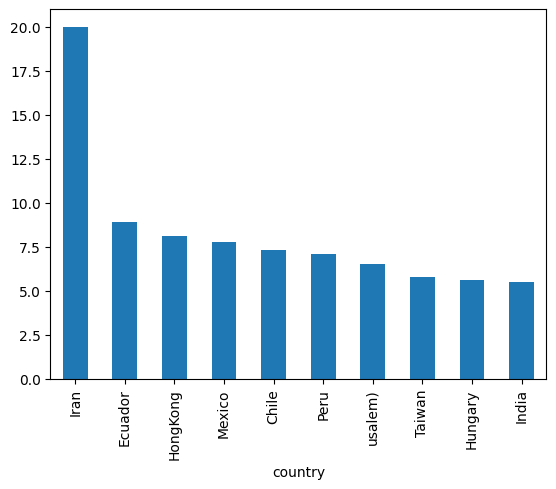

In [199]:
whole_table.groupby("country")["co"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

<Axes: xlabel='country'>

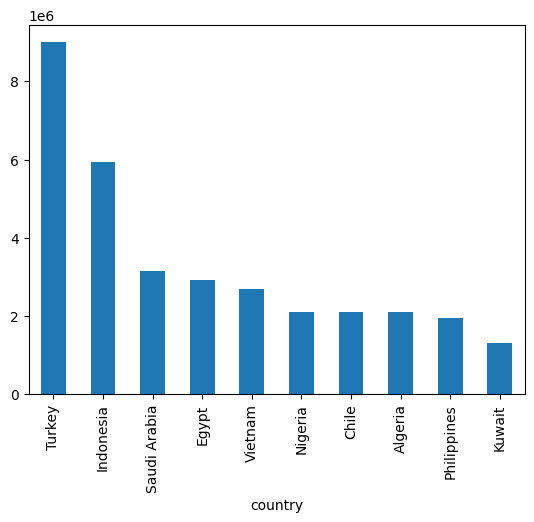

In [200]:
whole_table["Gasoline_Cars"]=whole_table["Gasoline_Cars"].astype(pd.Int64Dtype())
whole_table["Diesel_Cars"]=whole_table["Diesel_Cars"].astype(pd.Int64Dtype())
whole_table["Industrial_Factories"]=whole_table["Industrial_Factories"].astype(pd.Int64Dtype())

whole_table.groupby("country")["Gasoline_Cars"].mean().sort_values(ascending=False).head(10).plot(kind="bar")

# Making Fact Table and dimension Tables

In [227]:
dim_Time=whole_table["Time"].drop_duplicates().reset_index(drop=True)
dim_Time=pd.DataFrame(dim_Time)
dim_Time["Time_Key"]=range(1,len(dim_Time)+1)
dim_Time

,Time,Time_Key
0,22:00:00,1
1,21:00:00,2
2,20:00:00,3
3,08:00:00,4
4,13:00:00,5
5,16:00:00,6
6,03:00:00,7
7,23:00:00,8
8,06:00:00,9
9,09:00:00,10


In [202]:
dim_date=whole_table["newdate"].drop_duplicates().reset_index(drop=True)
dim_date=pd.DataFrame(dim_date)
dim_date["date_Key"]=range(1,len(dim_date)+1)
dim_date

,newdate,date_Key
0,2025-08-20,1
1,2025-03-04,2
2,2025-08-19,3
3,2025-08-16,4
4,2025-07-20,5
5,2025-02-17,6
6,2023-05-04,7
7,2022-02-27,8
8,2025-02-07,9
9,2021-08-15,10


In [203]:
dim_location=whole_table[["country","city"]].drop_duplicates().reset_index(drop=True)
dim_location["location_key"]=range(1,len(dim_location)+1)
dim_location

,country,city,location_key
0,None,Meguro (目黒),1
1,Indonesia,Kemayoran,2
2,Philippines,Manila US Embassy,3
3,Mexico,"Merced, México",4
4,Egypt,Cairo US Embassy,5
...,...,...,...
107,Gibraltar,Governors Lane (mobile),108
108,Jersey,Howard Davis Park,109
109,Andorra,Escaldes Engordany,110
110,Belize,Belmopan US Embassy,111


In [204]:
Fact_Table=whole_table.merge(dim_Time,on="Time",how="left")
Fact_Table

,newdate,Time,h,pm25,pm10,o3,co,country,city,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Time_Key
0,2025-08-20,22:00:00,68.9,50.0,24.0,37.6,2.3,None,Meguro (目黒),<NA>,<NA>,<NA>,1
1,2025-08-20,21:00:00,94.0,74.0,NaN,NaN,NaN,Indonesia,Kemayoran,5950000,2550000,2500,2
2,2025-08-20,20:00:00,74.0,88.0,NaN,NaN,NaN,Philippines,Manila US Embassy,1960000,840000,1800,3
3,2025-08-20,08:00:00,72.0,57.0,29.0,5.6,7.8,Mexico,"Merced, México",<NA>,<NA>,<NA>,4
4,2025-03-04,13:00:00,42.0,57.0,NaN,NaN,NaN,Egypt,Cairo US Embassy,2925000,1575000,1500,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2025-08-20,16:00:00,50.0,32.0,9.0,NaN,0.1,Gibraltar,Governors Lane (mobile),14000,6000,5,6
108,2025-08-20,15:00:00,79.5,32.0,13.0,NaN,NaN,Jersey,Howard Davis Park,42000,18000,10,16
109,2025-08-20,16:00:00,87.6,57.0,17.0,14.7,NaN,Andorra,Escaldes Engordany,42000,18000,5,6
110,2025-03-03,20:00:00,93.0,13.0,NaN,NaN,NaN,Belize,Belmopan US Embassy,84000,36000,20,3


In [205]:
Fact_Table=Fact_Table.merge(dim_date,on="newdate",how="left")
Fact_Table

,newdate,Time,h,pm25,pm10,o3,co,country,city,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Time_Key,date_Key
0,2025-08-20,22:00:00,68.9,50.0,24.0,37.6,2.3,None,Meguro (目黒),<NA>,<NA>,<NA>,1,1
1,2025-08-20,21:00:00,94.0,74.0,NaN,NaN,NaN,Indonesia,Kemayoran,5950000,2550000,2500,2,1
2,2025-08-20,20:00:00,74.0,88.0,NaN,NaN,NaN,Philippines,Manila US Embassy,1960000,840000,1800,3,1
3,2025-08-20,08:00:00,72.0,57.0,29.0,5.6,7.8,Mexico,"Merced, México",<NA>,<NA>,<NA>,4,1
4,2025-03-04,13:00:00,42.0,57.0,NaN,NaN,NaN,Egypt,Cairo US Embassy,2925000,1575000,1500,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2025-08-20,16:00:00,50.0,32.0,9.0,NaN,0.1,Gibraltar,Governors Lane (mobile),14000,6000,5,6,1
108,2025-08-20,15:00:00,79.5,32.0,13.0,NaN,NaN,Jersey,Howard Davis Park,42000,18000,10,16,1
109,2025-08-20,16:00:00,87.6,57.0,17.0,14.7,NaN,Andorra,Escaldes Engordany,42000,18000,5,6,1
110,2025-03-03,20:00:00,93.0,13.0,NaN,NaN,NaN,Belize,Belmopan US Embassy,84000,36000,20,3,22


In [206]:
Fact_Table=Fact_Table.merge(dim_location,on=["country","city"],how="inner")
Fact_Table

,newdate,Time,h,pm25,pm10,o3,co,country,city,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Time_Key,date_Key,location_key
0,2025-08-20,22:00:00,68.9,50.0,24.0,37.6,2.3,None,Meguro (目黒),<NA>,<NA>,<NA>,1,1,1
1,2025-08-20,21:00:00,94.0,74.0,NaN,NaN,NaN,Indonesia,Kemayoran,5950000,2550000,2500,2,1,2
2,2025-08-20,20:00:00,74.0,88.0,NaN,NaN,NaN,Philippines,Manila US Embassy,1960000,840000,1800,3,1,3
3,2025-08-20,08:00:00,72.0,57.0,29.0,5.6,7.8,Mexico,"Merced, México",<NA>,<NA>,<NA>,4,1,4
4,2025-03-04,13:00:00,42.0,57.0,NaN,NaN,NaN,Egypt,Cairo US Embassy,2925000,1575000,1500,5,2,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2025-08-20,16:00:00,50.0,32.0,9.0,NaN,0.1,Gibraltar,Governors Lane (mobile),14000,6000,5,6,1,108
108,2025-08-20,15:00:00,79.5,32.0,13.0,NaN,NaN,Jersey,Howard Davis Park,42000,18000,10,16,1,109
109,2025-08-20,16:00:00,87.6,57.0,17.0,14.7,NaN,Andorra,Escaldes Engordany,42000,18000,5,6,1,110
110,2025-03-03,20:00:00,93.0,13.0,NaN,NaN,NaN,Belize,Belmopan US Embassy,84000,36000,20,3,22,111


In [208]:
Trees_Filters=pd.read_csv("Trees-and-Filters.csv")
Trees_Filters=Trees_Filters["country,city,estimated_tree_cover_percent,data_source,estimated_factories_with_filters_percent"].str.rsplit(",",n=3,expand=True)
Trees_Filters[["5","6"]]=Trees_Filters[0].str.split(",",n=1,expand=True)
Trees_Filters.columns=["Country_City","Tree_Cover_Precent","Source","Filter_Percent","country","city"]
Trees_Filters=Trees_Filters[["country","city","Tree_Cover_Precent","Filter_Percent"]].drop_duplicates().reset_index(drop=True)
Trees_Filters=Trees_Filters.drop_duplicates(subset="country")
Trees_Filters


,country,city,Tree_Cover_Precent,Filter_Percent
0,,Seoul,27.9,92
1,Indonesia,Jakarta (Kemayoran),21.0,45
2,Philippines,Manila,20.0,40
4,Mexico,Mexico City,9.5,65
5,Egypt,Cairo,8.0,35
...,...,...,...,...
126,Jersey,St. Helier,20.0,92
129,Andorra,Andorra la Vella,35.0,91
132,Belize,Belmopan,60.0,55
133,Bermuda,Hamilton,35.0,88


In [209]:
Trees_Filters["city"].unique()

array(['Seoul', 'Jakarta (Kemayoran)', 'Manila', 'Mexico City', 'Cairo',
       'Dhaka', 'Moscow', 'Buenos Aires', 'Tehran', 'Kinshasa', 'Lima',
       'Hanoi', 'Bogota', 'Khartoum', 'Hong Kong', 'Riyadh', 'Santiago',
       'Yangon (Rangoon)', 'Baghdad', 'Singapore', 'Ankara (Sıhhıye)',
       'Addis Ababa', 'Nairobi', 'Arlington (Northern Virginia)',
       'Abidjan', 'Cape Town', 'Berlin', 'Kabul', 'Bamako', 'Amman',
       'Abuja', 'Tashkent', 'Ouagadougou', 'Athens', 'Guatemala City',
       'Kuwait City', 'Kyiv', 'Rome', 'Taipei', 'Bucharest', 'Algiers',
       'Baku', 'Vienna', 'Phnom Penh', 'Warsaw', 'San Juan', 'Quito',
       'Budapest', 'Kampala', 'Conakry', 'Dushanbe', 'San Salvador',
       'Lome', 'Abu Dhabi', 'Sofia', 'Ulaanbaatar', 'Prague',
       'Copenhagen', 'Helsinki', 'Antananarivo', 'Belgrade', 'Kigali',
       'Bishkek', 'Tbilisi', 'Yerevan', 'Nur-Sultan (Astana)', 'Ottawa',
       'Ashgabat', 'Islamabad', 'Stockholm', 'Vientiane', 'Jerusalem',
       "N'Djamena

In [210]:
Fact_Table=Fact_Table.merge(Trees_Filters,on="country",how="inner")
Fact_Table

,newdate,Time,h,pm25,pm10,o3,co,country,city_x,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Time_Key,date_Key,location_key,city_y,Tree_Cover_Precent,Filter_Percent
0,2025-08-20,21:00:00,94.0,74.0,NaN,NaN,NaN,Indonesia,Kemayoran,5950000,2550000,2500,2,1,2,Jakarta (Kemayoran),21.0,45
1,2025-08-20,20:00:00,74.0,88.0,NaN,NaN,NaN,Philippines,Manila US Embassy,1960000,840000,1800,3,1,3,Manila,20.0,40
2,2025-08-20,08:00:00,72.0,57.0,29.0,5.6,7.8,Mexico,"Merced, México",<NA>,<NA>,<NA>,4,1,4,Mexico City,9.5,65
3,2025-03-04,13:00:00,42.0,57.0,NaN,NaN,NaN,Egypt,Cairo US Embassy,2925000,1575000,1500,5,2,5,Cairo,8.0,35
4,2025-03-04,16:00:00,20.0,152.0,NaN,NaN,NaN,Bangladesh,Dhaka US Consulate,1080000,720000,3000,6,2,6,Dhaka,12.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,2025-08-20,16:00:00,50.0,32.0,9.0,NaN,0.1,Gibraltar,Governors Lane (mobile),14000,6000,5,6,1,108,Gibraltar,10.0,90
94,2025-08-20,15:00:00,79.5,32.0,13.0,NaN,NaN,Jersey,Howard Davis Park,42000,18000,10,16,1,109,St. Helier,20.0,92
95,2025-08-20,16:00:00,87.6,57.0,17.0,14.7,NaN,Andorra,Escaldes Engordany,42000,18000,5,6,1,110,Andorra la Vella,35.0,91
96,2025-03-03,20:00:00,93.0,13.0,NaN,NaN,NaN,Belize,Belmopan US Embassy,84000,36000,20,3,22,111,Belmopan,60.0,55


In [211]:
Fact_Table.duplicated().sum()

np.int64(0)

In [213]:
Fact_Table
Fact_Table=Fact_Table[["location_key","date_Key","Time_Key","h","co","o3","pm10","pm25","Gasoline_Cars","Diesel_Cars","Industrial_Factories","Tree_Cover_Precent","Filter_Percent"]]
Fact_Table.duplicated().sum()
Fact_Table

,location_key,date_Key,Time_Key,h,co,o3,pm10,pm25,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Tree_Cover_Precent,Filter_Percent
0,2,1,2,94.0,NaN,NaN,NaN,74.0,5950000,2550000,2500,21.0,45
1,3,1,3,74.0,NaN,NaN,NaN,88.0,1960000,840000,1800,20.0,40
2,4,1,4,72.0,7.8,5.6,29.0,57.0,<NA>,<NA>,<NA>,9.5,65
3,5,2,5,42.0,NaN,NaN,NaN,57.0,2925000,1575000,1500,8.0,35
4,6,2,6,20.0,NaN,NaN,NaN,152.0,1080000,720000,3000,12.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,108,1,6,50.0,0.1,NaN,9.0,32.0,14000,6000,5,10.0,90
94,109,1,16,79.5,NaN,NaN,13.0,32.0,42000,18000,10,20.0,92
95,110,1,6,87.6,NaN,14.7,17.0,57.0,42000,18000,5,35.0,91
96,111,22,3,93.0,NaN,NaN,NaN,13.0,84000,36000,20,60.0,55


# Making a connect to SnowFlake

In [215]:
pip install snowflake-connector-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.0/74.0 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.0/14.0 MB 84.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 5.4 MB/s eta 0:00:00


In [216]:
import snowflake.connector as sf

In [217]:
connection = sf.connect(
    user="MOHAMEDELMETWALLY",
    password="Metoo01155411540",
    account="QUUOOKR-JA05160",
    warehouse="COMPUTE_WH",
    role="ACCOUNTADMIN"
)

# Creating a databse is called air pollution and a schema is called pollution

In [218]:
cur =connection.cursor()
cur.execute("create database if not exists air_pollution")
cur.execute("use database air_pollution")
cur.execute("create schema if not exists pollution")

In [219]:
cur.execute("drop table dim_Time")
cur.execute("drop table dim_Date")
cur.execute("drop table dim_location")
cur.execute("drop table Fact_Table")

# Creating Fact Table and Dimension Tables in Snowflake

In [220]:
cur.execute(
    """ create table dim_Time (
      Time varchar(100),
      Time_key int primary key
    )
    """
)

In [231]:
records=dim_Time.to_records(index=False).tolist()
records

[('22:00:00', 1),
 ('21:00:00', 2),
 ('20:00:00', 3),
 ('08:00:00', 4),
 ('13:00:00', 5),
 ('16:00:00', 6),
 ('03:00:00', 7),
 ('23:00:00', 8),
 ('06:00:00', 9),
 ('09:00:00', 10),
 ('11:18:00', 11),
 ('10:00:00', 12),
 ('18:00:00', 13),
 ('05:00:00', 14),
 ('17:00:00', 15),
 ('15:00:00', 16),
 ('19:00:00', 17),
 ('14:00:00', 18),
 ('11:00:00', 19),
 ('01:00:00', 20),
 ('-1:00:00', 21),
 ('12:00:00', 22),
 ('00:00:00', 23)]

In [228]:
dim_Time["Time"].dropna(inplace=True)

In [229]:
dim_Time.loc[dim_Time["Time_Key"]==21,"Time"]="-1:00:00"

In [230]:
dim_Time["Time"]=dim_Time["Time"].astype(str)

In [232]:
cur.executemany("insert into dim_Time values (%s,%s)",records)

In [233]:
cur.execute(
    """ create table dim_Date (
      Date date,
      date_key int primary key
    )
    """
)

In [237]:
records=dim_date.to_records(index=False).tolist()
records

[('2025-08-20', 1),
 ('2025-03-04', 2),
 ('2025-08-19', 3),
 ('2025-08-16', 4),
 ('2025-07-20', 5),
 ('2025-02-17', 6),
 ('2023-05-04', 7),
 ('2022-02-27', 8),
 ('2025-02-07', 9),
 ('2021-08-15', 10),
 ('2023-10-17', 11),
 ('2023-03-20', 12),
 ('2022-10-19', 13),
 ('1500-02-10', 14),
 ('2025-01-28', 15),
 ('2023-06-15', 16),
 ('2025-02-26', 17),
 ('2024-08-09', 18),
 ('2025-08-21', 19),
 ('2024-12-12', 20),
 ('2024-06-30', 21),
 ('2025-03-03', 22)]

In [235]:
dim_date["newdate"]=dim_date["newdate"].astype(str)

In [236]:
dim_date.loc[dim_date["newdate"]=="NaT","newdate"]='1500-02-10'

In [238]:
cur.executemany("insert into dim_Date (Date,Date_key) values (%s,%s)",records)

In [239]:
cur.execute(
    """ create table dim_location (
      Country varchar(100),
      city varchar(200),
      location_key int primary key
    )
    """
)

In [242]:
records=dim_location.to_records(index=False).tolist()
records

[('Unkown', 'Meguro (目黒)', 1),
 ('Indonesia', 'Kemayoran', 2),
 ('Philippines', 'Manila US Embassy', 3),
 ('Mexico', 'Merced, México', 4),
 ('Egypt', 'Cairo US Embassy', 5),
 ('Bangladesh', 'Dhaka US Consulate', 6),
 ('Москва)', 'Spirid, Moscow, Moscow, Russia (Спиридоновка', 7),
 ('Argentina', 'Cordoba, Buenos Aires', 8),
 ('Iran', 'Imam Khomeini', 9),
 ('Congo', 'Kinshasa US Embassy', 10),
 ('Peru', 'Campo De Marte, Lima', 11),
 ('Vietnam', 'United Nations International School of Hanoi', 12),
 ('Colombia', 'San Cristobal, Bogota', 13),
 ('Sudan', 'Khartoum US Embassy', 14),
 ('HongKong', 'Central', 15),
 ('Saudi Arabia', 'Riyadh - Officers', 16),
 ('Chile', "Parque O'Higgins", 17),
 ('Maynmar', 'Rangoon US Embassy', 18),
 ('Iraq', 'Baghdad US Embassy', 19),
 ('Singapore', 'South', 20),
 ('Turkey', 'Sıhhıye', 21),
 ('Ethiopia', 'Addis Ababa US Embassy', 22),
 ('Kenya', 'Nairobi US Embassy', 23),
 ('USA', 'Aurora Hills Visitor Center, Northern Virginia', 24),
 ('Ivory Coast', 'Abidjan 

In [241]:
dim_location.fillna("Unkown",inplace=True)

In [243]:
cur.executemany("insert into dim_location  values (%s,%s,%s)",records)

In [253]:
Fact_Table

,location_key,date_Key,Time_Key,h,co,o3,pm10,pm25,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Tree_Cover_Precent,Filter_Percent
0,2,1,2,94.0,None,None,None,74.0,5950000,2550000,2500,21.0,45
1,3,1,3,74.0,None,None,None,88.0,1960000,840000,1800,20.0,40
2,4,1,4,72.0,7.8,5.6,29.0,57.0,None,None,None,9.5,65
3,5,2,5,42.0,None,None,None,57.0,2925000,1575000,1500,8.0,35
4,6,2,6,20.0,None,None,None,152.0,1080000,720000,3000,12.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,108,1,6,50.0,0.1,None,9.0,32.0,14000,6000,5,10.0,90
94,109,1,16,79.5,None,None,13.0,32.0,42000,18000,10,20.0,92
95,110,1,6,87.6,None,14.7,17.0,57.0,42000,18000,5,35.0,91
96,111,22,3,93.0,None,None,None,13.0,84000,36000,20,60.0,55


In [254]:
cur.execute("drop table Fact_Table")

In [256]:
cur.execute(
    """ create table Fact_Table (
      location_key int,
      date_key int,
      Time_key int,
      H float,
      co float,
      o3 float,
      pm10 float,
      pm25 float,
      Gasoline_Cars int,
      Diesel_Cars int,
      Industrial_Factories int,
      Tree_Cover_Precent	float,
      Filter_Percent float,
      foreign key (location_key) references dim_location (location_key),
      foreign key (date_key) references dim_Date (date_key),
      foreign key (Time_key) references dim_Time (time_key)
    )
    """
)

In [257]:
records=Fact_Table.to_records(index=False).tolist()
records

[(2, 1, 2, 94.0, None, None, None, 74.0, 5950000, 2550000, 2500, '21.0', '45'),
 (3, 1, 3, 74.0, None, None, None, 88.0, 1960000, 840000, 1800, '20.0', '40'),
 (4, 1, 4, 72.0, 7.8, 5.6, 29.0, 57.0, None, None, None, '9.5', '65'),
 (5, 2, 5, 42.0, None, None, None, 57.0, 2925000, 1575000, 1500, '8.0', '35'),
 (6, 2, 6, 20.0, None, None, None, 152.0, 1080000, 720000, 3000, '12.0', '25'),
 (8, 4, 8, 89.0, 4.7, None, 21.0, None, None, None, None, '16.0', '60'),
 (9, 5, 3, 9.0, 20.0, None, 68.0, 73.0, None, None, None, '18.5', '40'),
 (10, 6, 9, 88.0, None, None, None, 93.0, 595000, 255000, 200, '45.0', '15'),
 (11, 1, 10, 81.0, 7.1, 8.5, 20.0, 55.0, None, None, None, '10.0', '55'),
 (12,
  1,
  3,
  92.0,
  None,
  None,
  None,
  103.0,
  2700000,
  1800000,
  2200,
  '40.0',
  '50'),
 (13, 1, 10, 51.0, 5.2, 5.6, 18.0, 61.0, None, None, None, '17.0', '58'),
 (14, 7, 1, 12.0, None, None, None, 149.0, 450000, 300000, 150, '5.0', '10'),
 (16, 8, 11, 29.0, 3.0, 7.0, 33.0, None, 3150000, 13500

In [258]:
import numpy as np
Fact_Table = Fact_Table.replace({pd.NaT :None ,np.nan : None})
Fact_Table

,location_key,date_Key,Time_Key,h,co,o3,pm10,pm25,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Tree_Cover_Precent,Filter_Percent
0,2,1,2,94.0,None,None,None,74.0,5950000,2550000,2500,21.0,45
1,3,1,3,74.0,None,None,None,88.0,1960000,840000,1800,20.0,40
2,4,1,4,72.0,7.8,5.6,29.0,57.0,None,None,None,9.5,65
3,5,2,5,42.0,None,None,None,57.0,2925000,1575000,1500,8.0,35
4,6,2,6,20.0,None,None,None,152.0,1080000,720000,3000,12.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,108,1,6,50.0,0.1,None,9.0,32.0,14000,6000,5,10.0,90
94,109,1,16,79.5,None,None,13.0,32.0,42000,18000,10,20.0,92
95,110,1,6,87.6,None,14.7,17.0,57.0,42000,18000,5,35.0,91
96,111,22,3,93.0,None,None,None,13.0,84000,36000,20,60.0,55


In [259]:
cur.executemany("insert into Fact_Table values (%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s,%s)",records)

In [260]:
cur.execute("select * from dim_Time")

for row in cur :
  print(row)

('22:00:00', 1)
('21:00:00', 2)
('20:00:00', 3)
('08:00:00', 4)
('13:00:00', 5)
('16:00:00', 6)
('03:00:00', 7)
('23:00:00', 8)
('06:00:00', 9)
('09:00:00', 10)
('11:18:00', 11)
('10:00:00', 12)
('18:00:00', 13)
('05:00:00', 14)
('17:00:00', 15)
('15:00:00', 16)
('19:00:00', 17)
('14:00:00', 18)
('11:00:00', 19)
('01:00:00', 20)
('-1:00:00', 21)
('12:00:00', 22)
('00:00:00', 23)


In [261]:
Fact_Table

,location_key,date_Key,Time_Key,h,co,o3,pm10,pm25,Gasoline_Cars,Diesel_Cars,Industrial_Factories,Tree_Cover_Precent,Filter_Percent
0,2,1,2,94.0,None,None,None,74.0,5950000,2550000,2500,21.0,45
1,3,1,3,74.0,None,None,None,88.0,1960000,840000,1800,20.0,40
2,4,1,4,72.0,7.8,5.6,29.0,57.0,None,None,None,9.5,65
3,5,2,5,42.0,None,None,None,57.0,2925000,1575000,1500,8.0,35
4,6,2,6,20.0,None,None,None,152.0,1080000,720000,3000,12.0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,108,1,6,50.0,0.1,None,9.0,32.0,14000,6000,5,10.0,90
94,109,1,16,79.5,None,None,13.0,32.0,42000,18000,10,20.0,92
95,110,1,6,87.6,None,14.7,17.0,57.0,42000,18000,5,35.0,91
96,111,22,3,93.0,None,None,None,13.0,84000,36000,20,60.0,55


In [262]:
cur.close()
connection.close()